In [0]:
# setup matplotlib for nice display in Jupyter
# %matplotlib notebook

# a few libraries we will need
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp
import matplotlib.animation as animation

import IPython

np.set_printoptions(precision=5,linewidth=120,suppress=True)

# import linear_oc_tools as oc

# Exercise 1

In [0]:
## System 1
A1 = np.array([[0.5,   0,  0.5],
               [  0,   0,   -2],
               [  4,   2,    1]])

B1 = np.array([[  0,   0],
               [  1,   0],
               [  0,   1]])

## System 2
A2 = np.array([[0.5,   0,  0.5],
               [  0,   0, -0.5],
               [0.5, 0.5,  0.5]])

B2 = np.array([[  0,   0],
               [  1,   0],
               [  0,   1]])

## System 3
A3 = np.array([[0.5,   0,    0],
               [  0,   0,   -2],
               [  1,   1,    0]])

B3 = np.array([[  0,   0],
               [  1,   0],
               [  0,   1]])

In [0]:
def check_stability(A):
  """
  Check whether the uncontrolled system is stable.

  Params:
    A: the system dynamics.
  
  Returns:
    ret: True if the system is stable;
    eigs: eigen values of the system.
  """

  eigs= np.linalg.eigvals(A)
  ret = np.all(np.abs(eigs) < 1)

  return ret, eigs

In [20]:
check_stability(A3)

(False, array([0. +1.41421j, 0. -1.41421j, 0.5+0.j     ]))

In [0]:
def check_controllability(A, B):
  """
  Check whether the system is controllable.

  Params:
    A: the system dynamics;
    B: the control matrix.
  
  Return:
    ret: True if the system is controllable;
    rank: the rank of the matrix [B AB A^2B ... ].
  """

  k = A.shape[0]

  mat = B
  R = B
  for i in range(1, k):
    mat = A @ mat
    R = np.hstack([R, mat])
  
  
  print(R)

  rank = np.linalg.matrix_rank(R)
  ret = (rank == k)

  return ret, rank

In [22]:
check_controllability(A3, B3)

[[ 0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0. -2. -2.  0.]
 [ 0.  1.  1.  0.  0. -2.]]


(False, 2)

In [0]:
def LQR(A, B, Q, R, N):
  """
  Solve the LQR with given system and cost function.

  Params:
    A: the system dynamics;
    B: the control matrix;
    Q: the quadratic cost matrix, x.T Q x;
    R: the quadratic cost matrix, u.T R u;
    N: the number of time step.
  
  Return:
    Ks: the gains.
  """

  def DARE(P):
    """
    A helper function to solve discrete-time algebraic Riccati equation (DARE) 
    for each time step.
    """

    K = -np.linalg.inv(B.T @ P @ B + R) @ B.T @ P @ A
    P = Q + A.T @ P @ A + A.T @ P @ B @ K

    return K, P

  Ks = []

  P = Q
  for i in range(N):
    K, P = DARE(P)
    Ks = [K] + Ks
  
  return Ks

In [0]:
def forward(A, B, Ks, x0):
  """
  Run the forward simulation with given initial state.

  Params:
    A: the system dynamics;
    B: the control matrix;
    Ks: the gains;
    x0: the initial state.
  
  Returns:
    xs: the trajectories;
    us: the control sequence.
  """

  x = x0
  xs = [x0]
  us = []

  for K in Ks:
    u = K @ x
    us.append(u)

    x_next = A @ x + B @ u
    xs.append(x_next)

    x = x_next
  
  return xs, us

In [0]:
def plot_trajectory(xs, us):
  """
  Plot the 3D trajectory.
  """

  fig = plt.figure(figsize=(16, 6))
  xs = np.array(xs)
  us = np.array(us)

  plt.subplot(1,2,1)
  plt.plot(xs[:, 0], '-o', label="x0")
  plt.plot(xs[:, 1], '-o', label="x1")
  plt.plot(xs[:, 2], '-o', label="x2")
  plt.legend()
  plt.xlabel("Time Step")
  plt.ylabel("State x")

  plt.subplot(1,2,2)
  plt.plot(us[:, 0], '-o', label="u0")
  plt.plot(us[:, 1], '-o', label="u1")
  plt.legend()
  plt.xlabel("Time Step")
  plt.ylabel("Control u")

In [0]:
x0 = np.array([10, 10, 10])
Q = 100 * np.eye(3)
R = np.eye(2)

In [0]:
N = 10

Ks = LQR(A1, B1, Q, R, N)
xs, us = forward(A1, B1, Ks, x0)

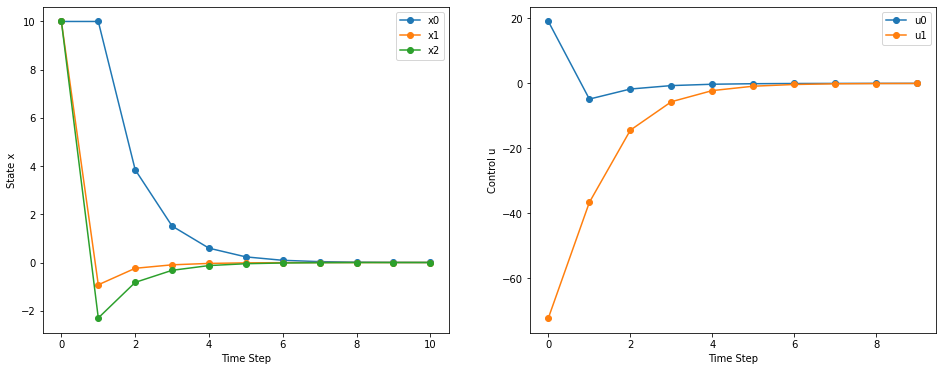

In [28]:
plot_trajectory(xs, us)

In [0]:
N = 10

Ks = LQR(A2, B2, Q, R, N)
xs, us = forward(A2, B2, Ks, x0)

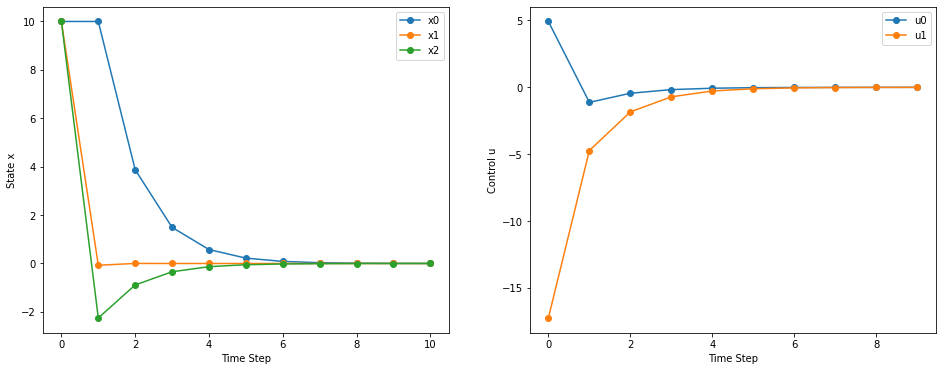

In [30]:
plot_trajectory(xs, us)

In [0]:
N = 10

Ks = LQR(A3, B3, Q, R, N)
xs, us = forward(A3, B3, Ks, x0)

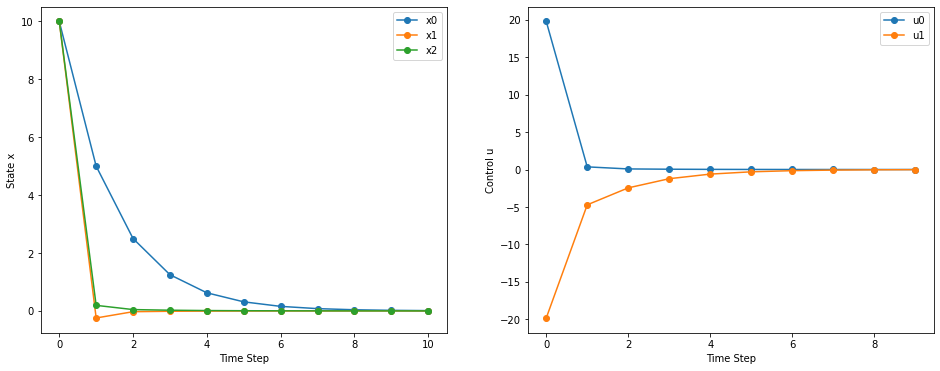

In [32]:
plot_trajectory(xs, us)